In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df = pd.read_csv('data/tweets_users.csv', parse_dates=['date'])
user_df = pd.read_csv('data/user_data.csv')

In [3]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [4]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,...,following,likes,url,verified,geotext,city,country,iso3,month,day
0,2020-07-09 17:42:45,RhinobotStudios,NaN,2,0,5,That moment when you learn about @Podchaser 's...,NaN,@Podchaser,#PodRevDay #facepalm,...,7,25,NaN,0,<geotext.geotext.GeoText object at 0x7f645a5ef...,NaN,NaN,NaN,7,9
1,2020-07-09 17:30:21,_joe_stone_,NaN,0,1,1,... a little late for #podrevday but check out...,NaN,@bigswingpodcast,#podrevday,...,776,3409,http://www.JamStreetMedia.com,0,<geotext.geotext.GeoText object at 0x7f645a111...,Vancouver,United States,USA,7,9
2,2020-07-09 11:18:43,JTTG,NaN,0,2,5,(shared the wrong review didn't I) THIS IS MY ...,NaN,@LetsFightABoss @Podchaser,#PodRevDay,...,610,3275,http://www.followthesound.co.uk,0,<geotext.geotext.GeoText object at 0x7f645a67b...,Oxford,United Kingdom,GBR,7,9
3,2020-07-09 10:53:51,podsnaija,dsmileoutreach,1,1,3,#AbujaTwitterCommunity #Abuja #Africa #podcast...,NaN,NaN,#AbujaTwitterCommunity #Abuja #Africa #podcast...,...,43,361,http://www.anchor.fm/podsnaija,0,<geotext.geotext.GeoText object at 0x7f645a111...,NaN,Nigeria,NGA,7,9
4,2020-07-09 09:14:57,CastingLotsPod,PodRevDay,0,0,1,Oops! Sorry We've come at this backwards (our ...,NaN,NaN,NaN,...,55,662,https://castinglotspod.home.blog,0,<geotext.geotext.GeoText object at 0x7f645a111...,NaN,NaN,NaN,7,9


In [5]:
tweet_table = df.groupby('username').size().reset_index(name="tweets")
tweets_total = df.shape[0]
unique_users = df["username"].nunique()
sum_followers = sum(user_df.followers)
unique_countries = df.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df.retweets)
avg_favorite = np.mean(df.favorites)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participted in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Averge Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

992: Tweets using the hashtag #PodRevDay.
268: People have participted in #PodRevDay.
457,936: Followers of participants in #PodRevDay.
15: Minimum number of countries with participants.
5.16: Averge Number of people liking a tweet about #PodRevDay
1.96: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [6]:
!mkdir plots

mkdir: cannot create directory ‘plots’: File exists


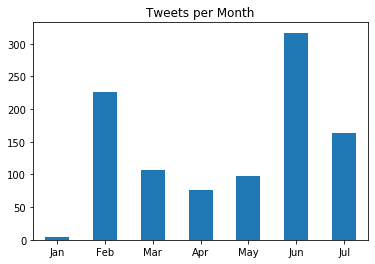

In [7]:
tweets_per_month = df.groupby('month').count().sort_values('month', ascending=True).reset_index()

months = ("Jan", 'Feb', "Mar", "Apr", 'May', "Jun", "Jul")
positions = (0, 1, 2, 3, 4, 5, 6)

ax = tweets_per_month.plot.bar(x='month', 
                          y='date', 
                          title="Tweets per Month",
                          legend=None)
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

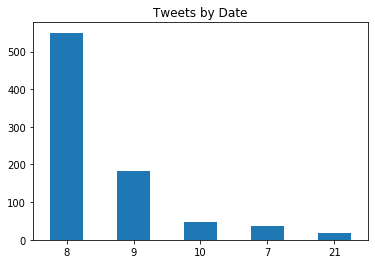

In [8]:
tweets_per_day = df.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

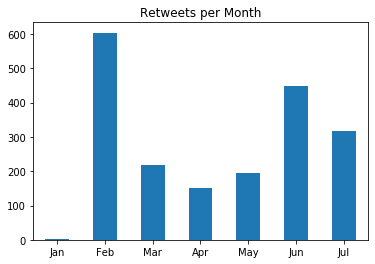

In [9]:
retweets_per_month = df.groupby(['month'])['retweets'].sum().sort_index(ascending=True)
ax3 = retweets_per_month.plot.bar(title="Retweets per Month")
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax3.figure.savefig('plots/retweets_per_month.png')

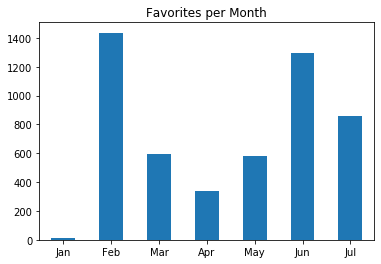

In [10]:
favorites_per_month = df.groupby(['month'])['favorites'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation='horizontal');
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

In [11]:
table = df.groupby(['month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [12]:
table_wide = table.pivot(index='month',
                               columns='country',
                               values=['total']).fillna(method='ffill', axis=0)
table_wide

total                                                     \
country Australia Canada Ecuador France Germany India Italy Malaysia   
month                                                                  
1             NaN    NaN     NaN    NaN     4.0   NaN   NaN      NaN   
2             5.0    2.0     NaN    NaN    61.0   NaN   6.0      2.0   
3             5.0    2.0     1.0    NaN    98.0   NaN   6.0      2.0   
4             6.0    2.0     1.0    NaN   123.0   NaN   6.0      2.0   
5             6.0    3.0     1.0    NaN   164.0   NaN   6.0      2.0   
6             6.0    4.0     1.0    NaN   194.0   3.0   6.0      2.0   
7             6.0    8.0     1.0    2.0   201.0   3.0   6.0      2.0   

                                                                       \
country New Zealand Nigeria Poland Serbia South Africa United Kingdom   
month                                                                   
1               NaN     NaN    NaN    NaN          NaN            NaN   
2               3.0     NaN    NaN    NaN          NaN            6.0   
3               4.0     NaN    NaN    NaN          NaN           12.0   
4               4.0     NaN    NaN    NaN          NaN           14.0   
5               5.0     NaN    NaN    NaN          NaN           21.0   
6               5.0     3.0    1.0    NaN          6.0           48.0   
7               6.0     4.0    4.0    1.0          6.0           66.0   

                       
country United States  
month                  
1                 NaN  
2                41.0  
3                70.0  
4                91.0  
5               116.0  
6               187.0  
7               205.0

In [13]:
table_wide.fillna(0, inplace=True)
table_wide

total                                                     \
country Australia Canada Ecuador France Germany India Italy Malaysia   
month                                                                  
1             0.0    0.0     0.0    0.0     4.0   0.0   0.0      0.0   
2             5.0    2.0     0.0    0.0    61.0   0.0   6.0      2.0   
3             5.0    2.0     1.0    0.0    98.0   0.0   6.0      2.0   
4             6.0    2.0     1.0    0.0   123.0   0.0   6.0      2.0   
5             6.0    3.0     1.0    0.0   164.0   0.0   6.0      2.0   
6             6.0    4.0     1.0    0.0   194.0   3.0   6.0      2.0   
7             6.0    8.0     1.0    2.0   201.0   3.0   6.0      2.0   

                                                                       \
country New Zealand Nigeria Poland Serbia South Africa United Kingdom   
month                                                                   
1               0.0     0.0    0.0    0.0          0.0            0.0   
2               3.0     0.0    0.0    0.0          0.0            6.0   
3               4.0     0.0    0.0    0.0          0.0           12.0   
4               4.0     0.0    0.0    0.0          0.0           14.0   
5               5.0     0.0    0.0    0.0          0.0           21.0   
6               5.0     3.0    1.0    0.0          6.0           48.0   
7               6.0     4.0    4.0    1.0          6.0           66.0   

                       
country United States  
month                  
1                 0.0  
2                41.0  
3                70.0  
4                91.0  
5               116.0  
6               187.0  
7               205.0

In [14]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [15]:
table_wide

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,South Africa,United Kingdom,United States
month,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,0.0,0.0,61.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,6.0,41.0
3,5.0,2.0,1.0,0.0,98.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,12.0,70.0
4,6.0,2.0,1.0,0.0,123.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,14.0,91.0
5,6.0,3.0,1.0,0.0,164.0,0.0,6.0,2.0,5.0,0.0,0.0,0.0,0.0,21.0,116.0
6,6.0,4.0,1.0,0.0,194.0,3.0,6.0,2.0,5.0,3.0,1.0,0.0,6.0,48.0,187.0
7,6.0,8.0,1.0,2.0,201.0,3.0,6.0,2.0,6.0,4.0,4.0,1.0,6.0,66.0,205.0


In [16]:
mon_num = list(range(1,8))
mon_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July']

months_dic = dict(zip(mon_num, mon_names))
table_wide.rename(index=months_dic, inplace=True)
table_wide

,Australia,Canada,Ecuador,France,Germany,India,Italy,Malaysia,New Zealand,Nigeria,Poland,Serbia,South Africa,United Kingdom,United States
month,,,,,,,,,,,,,,,
January,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,5.0,2.0,0.0,0.0,61.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.0,6.0,41.0
March,5.0,2.0,1.0,0.0,98.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,12.0,70.0
April,6.0,2.0,1.0,0.0,123.0,0.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,14.0,91.0
May,6.0,3.0,1.0,0.0,164.0,0.0,6.0,2.0,5.0,0.0,0.0,0.0,0.0,21.0,116.0
June,6.0,4.0,1.0,0.0,194.0,3.0,6.0,2.0,5.0,3.0,1.0,0.0,6.0,48.0,187.0
July,6.0,8.0,1.0,2.0,201.0,3.0,6.0,2.0,6.0,4.0,4.0,1.0,6.0,66.0,205.0


In [18]:
html = bcr.bar_chart_race(df=table_wide,
                   period_length=1000,
                   interpolate_period=False,
                   steps_per_period=300)
                   #filename="plots/podrevday.gif")

In [19]:
html.data

'<video width="964" height="504" controls autoplay loop>\n  <source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAArsz21kYXQAAAKvBgX//6vcRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg\nQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv\neDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9\nMHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm\nPTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6\nb25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v\na2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh\nY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly\nYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3\nZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3JlZnJl\nc2g9MCByY19sb29rYWhlYWQ9NDAgcm